https://scikit-learn.org/stable/modules/grid_search.html

### GridSearch : 
    - Automated hyperparameter tuning 

    in Random Forest: 
    
    hyperparameters : 
        n_estimators : number of indivisual DTs(base learners). [100,200,300]
        max_depth : max depth of base DTs. [3,5,7,10]
        

#### Exhaustive Grid Search

        
        
                    n-estimators
                    
                    100 200 300
        Max     3     .  .   .
        depth   5     .  .   .
                7     .  .   .
                10    .  .   .
                
                
          find the best combinations of hyperparamets , by training model with each combination.
          
          in above case : we train 4*3 = 12 RFs.
          
          RF1 , RF2 ... RF12
          
          take the max performing model . take that model's hyperparameters combination.
          - it is computationally expensive.
          - this will exhaust all the possibilites of Hyperparamer and returns the best result.
          
          
    
    

#### GridSearchCV : 

    in case: of k-fold:
    lets say: hyperparamets are: 
    
    3 fold cv
    4 set of hyperparamets of max_depth
    4 set of hyperparamets of n_estiamtors 
    
    total number of model training : 3*4*4 = 48 
    

#### RandomSearchCV : 

    takes random combinations of hyperparameters : 
    
    instead of set of hyperparameters , it takes the uniform distribuition , and chose combinations randomly.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

    sklearn.model_selection.GridSearchCV
    class sklearn.model_selection.GridSearchCV(
                            estimator, 
                            param_grid, *,
                            scoring=None,           
                            n_jobs=None,   #  
                            refit=True,
                            cv=None,         # cross validation
                            verbose=0,
                            pre_dispatch='2*n_jobs',
                            error_score=nan, 
                            return_train_score=False)
                            
                            
                            
          n_jobsint, default=None
    Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [1]:
from sklearn.model_selection import GridSearchCV

In [2]:
parameters = {"max_depth":[3,5,7,10,15],
             "n_estimators":[100,200,300],
             "max_features":[7,10,15,20]}

In [3]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test =  pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote,y_smote = smote.fit_resample(X_train,y_train)
X_smote.shape,y_smote.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

((1848, 36), (1848, 1))

In [4]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

In [5]:
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,        # use all the available processors in the system 
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)

In [6]:
grid_search.fit(X_smote,y_smote.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_features': [7, 10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [7]:
# grid_search.cv_results_

In [8]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=7, n_estimators=300)

In [9]:
grid_search.best_score_

0.9042207792207791

In [10]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 300}

    we dont need to refit again with best paramets , as we have passed refit=True already in grid search. 

In [11]:
r = pd.DataFrame(grid_search.cv_results_).iloc[:,4:]
r[["params","mean_test_score","rank_test_score"]]


<IPython.core.display.Javascript object>

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'max_features': 7, 'n_estimat...",0.839827,49
1,"{'max_depth': 3, 'max_features': 7, 'n_estimat...",0.838203,50
2,"{'max_depth': 3, 'max_features': 7, 'n_estimat...",0.831710,51
3,"{'max_depth': 3, 'max_features': 10, 'n_estima...",0.817100,54
4,"{'max_depth': 3, 'max_features': 10, 'n_estima...",0.821970,53
5,"{'max_depth': 3, 'max_features': 10, 'n_estima...",0.828463,52
6,"{'max_depth': 3, 'max_features': 15, 'n_estima...",0.814935,56
7,"{'max_depth': 3, 'max_features': 15, 'n_estima...",0.816558,55
8,"{'max_depth': 3, 'max_features': 15, 'n_estima...",0.813312,57
9,"{'max_depth': 3, 'max_features': 20, 'n_estima...",0.810065,59


### Fine tuning : 

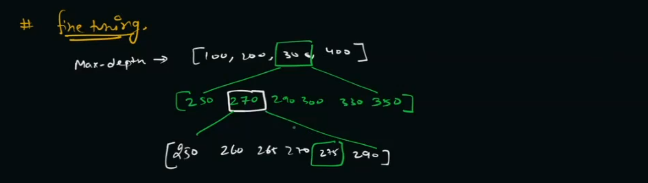

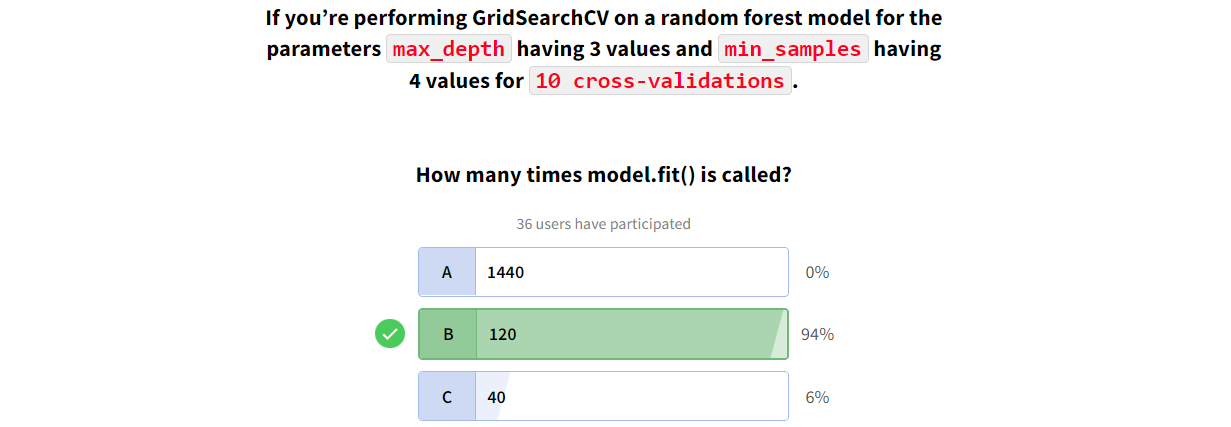